In [2]:
import pandas as pd

file_path = r'C:\Users\mishra\Downloads\archive (3)\Employee.csv'
employee_data = pd.read_csv(file_path)
employee_data.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
# Checking for missing values
missing_values = employee_data.isnull().sum()

# Checking and removing duplicate rows
duplicate_rows = employee_data.duplicated().sum()
employee_data = employee_data.drop_duplicates()

missing_values, duplicate_rows


(Education                    0
 JoiningYear                  0
 City                         0
 PaymentTier                  0
 Age                          0
 Gender                       0
 EverBenched                  0
 ExperienceInCurrentDomain    0
 LeaveOrNot                   0
 dtype: int64,
 1889)

In [4]:
employee_data.shape

(2764, 9)

In [38]:

summary_statistics = employee_data.describe()


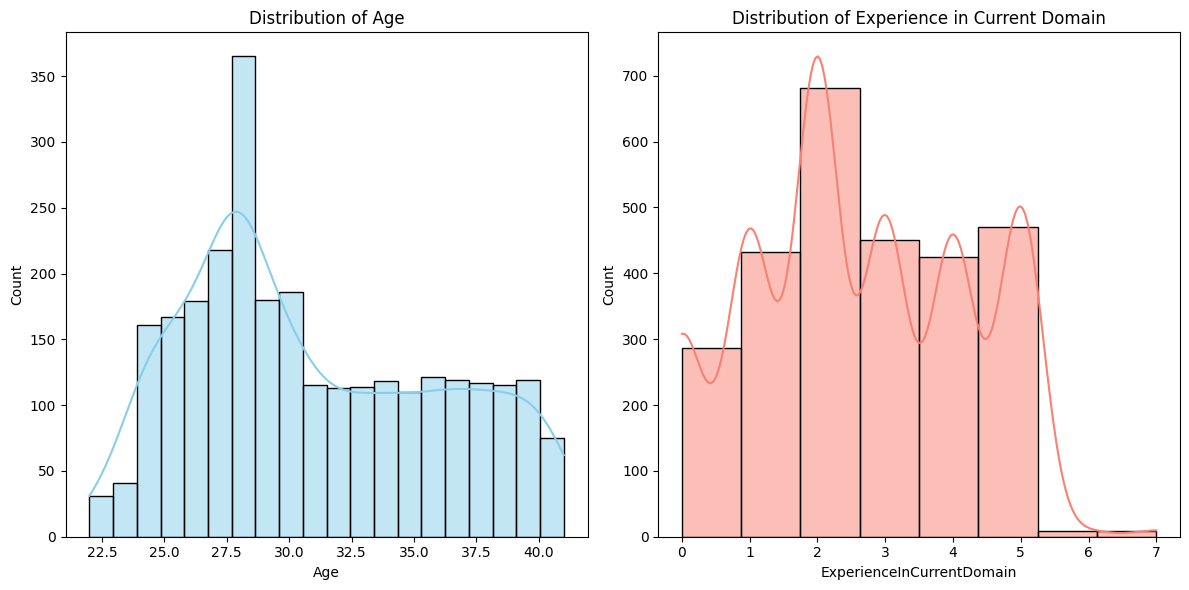

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(employee_data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')

# Distribution of Experience in Current Domain
plt.subplot(1, 2, 2)
sns.histplot(employee_data['ExperienceInCurrentDomain'], kde=True, bins=8, color='salmon')
plt.title('Distribution of Experience in Current Domain')

plt.tight_layout()
plt.show()


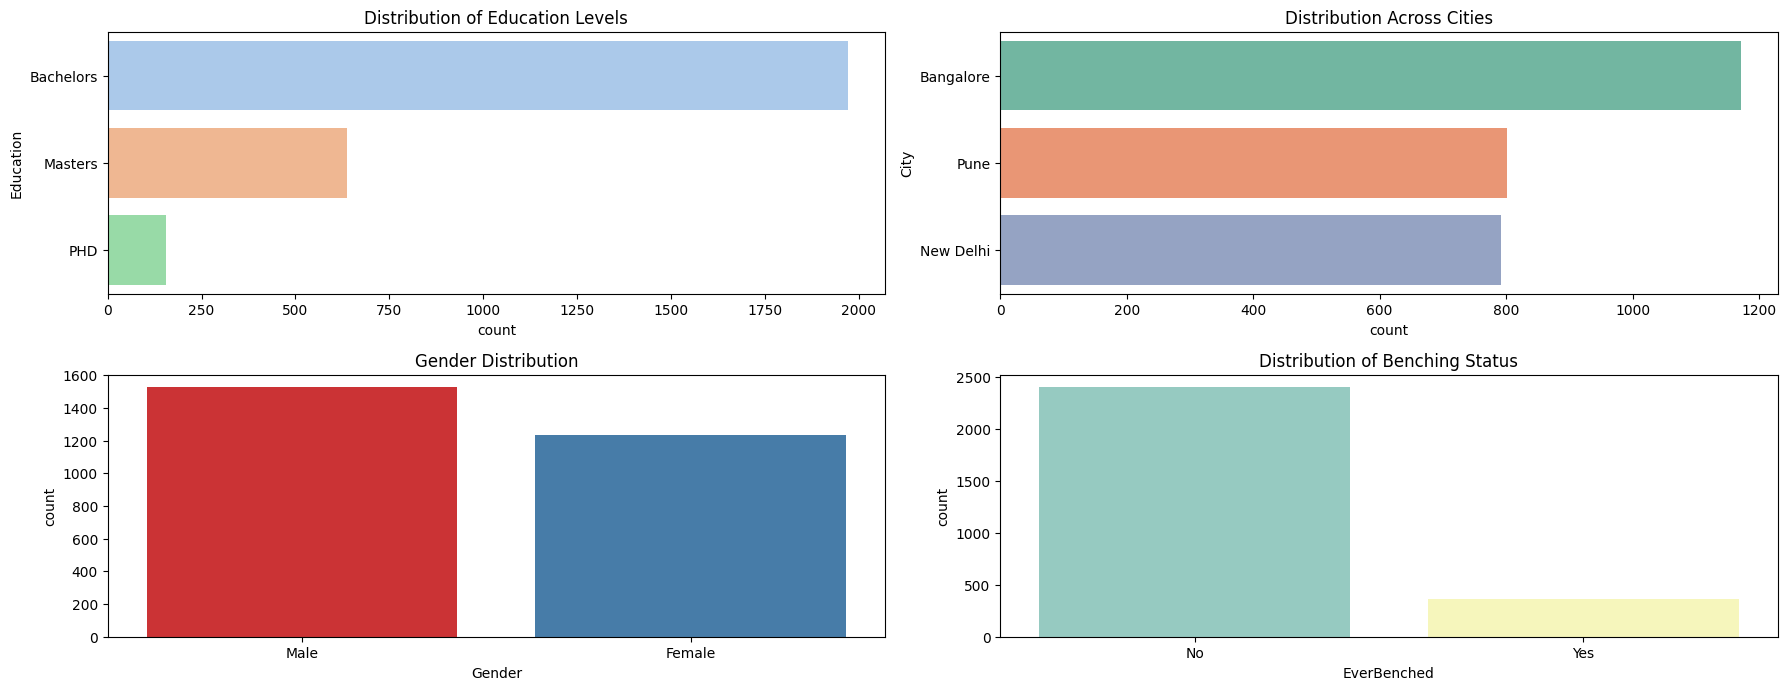

In [40]:
# Setting up the figure for multiple subplots
plt.figure(figsize=(18, 10))

# Education Distribution
plt.subplot(3, 2, 1)
sns.countplot(y='Education', data=employee_data, palette='pastel')
plt.title('Distribution of Education Levels')

# City Distribution
plt.subplot(3, 2, 2)
sns.countplot(y='City', data=employee_data, palette='Set2')
plt.title('Distribution Across Cities')

# Gender Distribution
plt.subplot(3, 2, 3)
sns.countplot(x='Gender', data=employee_data, palette='Set1')
plt.title('Gender Distribution')

# EverBenched Distribution
plt.subplot(3, 2, 4)
sns.countplot(x='EverBenched', data=employee_data, palette='Set3')
plt.title('Distribution of Benching Status')

plt.tight_layout()
plt.show()


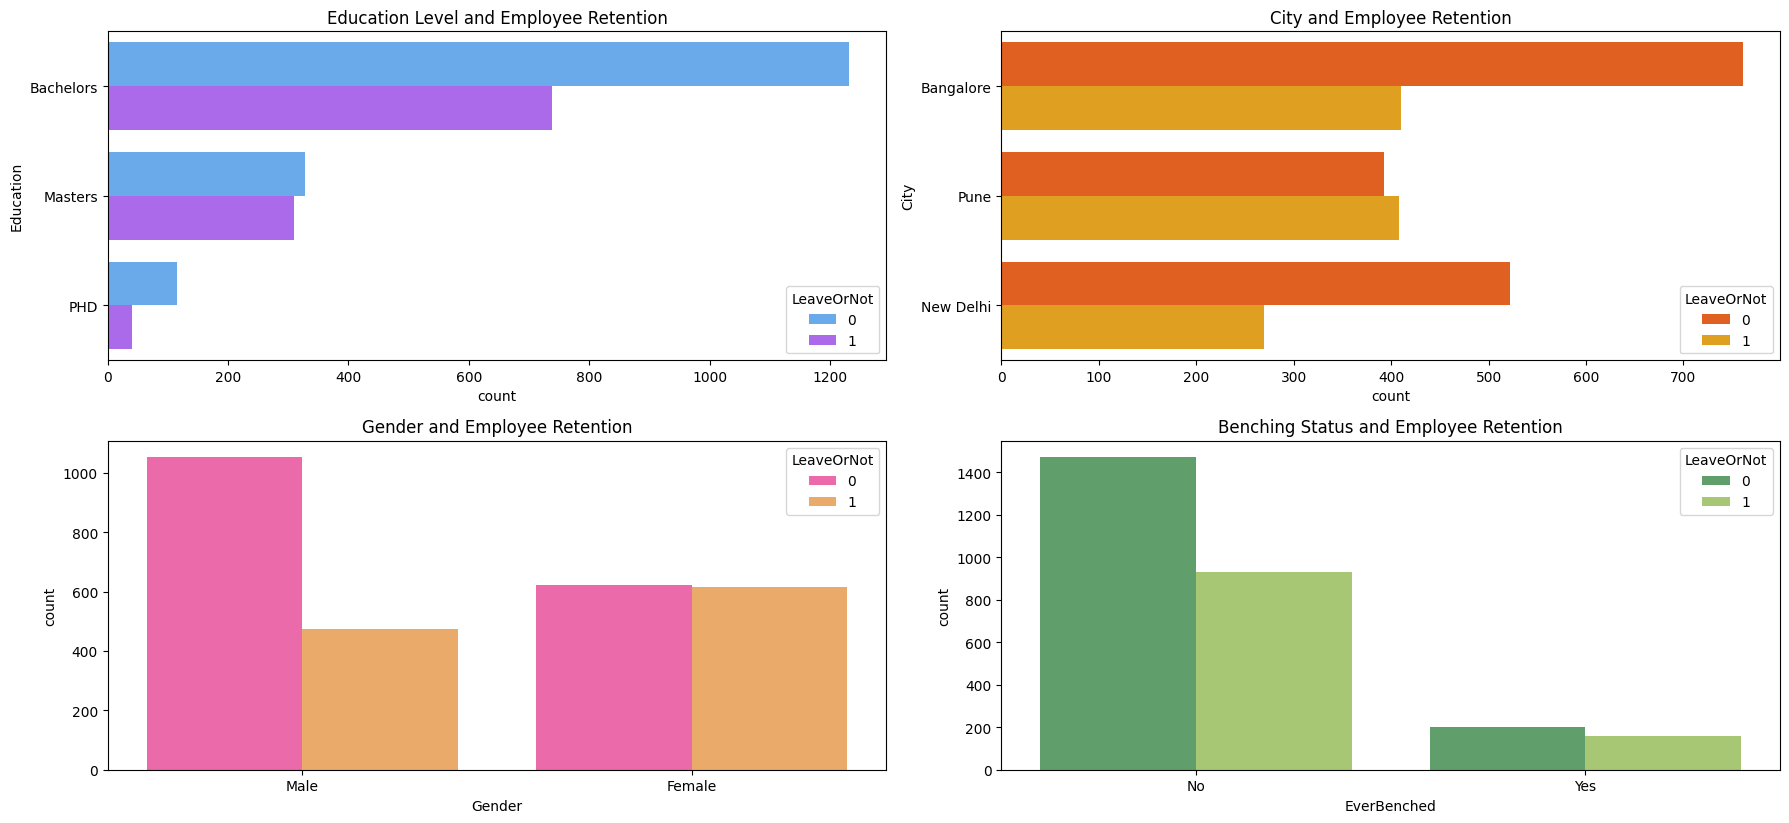

In [41]:
# Setting up the figure for multiple subplots
plt.figure(figsize=(18, 12))

# Education Level vs LeaveOrNot
plt.subplot(3, 2, 1)
sns.countplot(y='Education', hue='LeaveOrNot', data=employee_data, palette='cool')
plt.title('Education Level and Employee Retention')

# City vs LeaveOrNot
plt.subplot(3, 2, 2)
sns.countplot(y='City', hue='LeaveOrNot', data=employee_data, palette='autumn')
plt.title('City and Employee Retention')

# Gender vs LeaveOrNot
plt.subplot(3, 2, 3)
sns.countplot(x='Gender', hue='LeaveOrNot', data=employee_data, palette='spring')
plt.title('Gender and Employee Retention')

# EverBenched vs LeaveOrNot
plt.subplot(3, 2, 4)
sns.countplot(x='EverBenched', hue='LeaveOrNot', data=employee_data, palette='summer')
plt.title('Benching Status and Employee Retention')

plt.tight_layout()
plt.show()


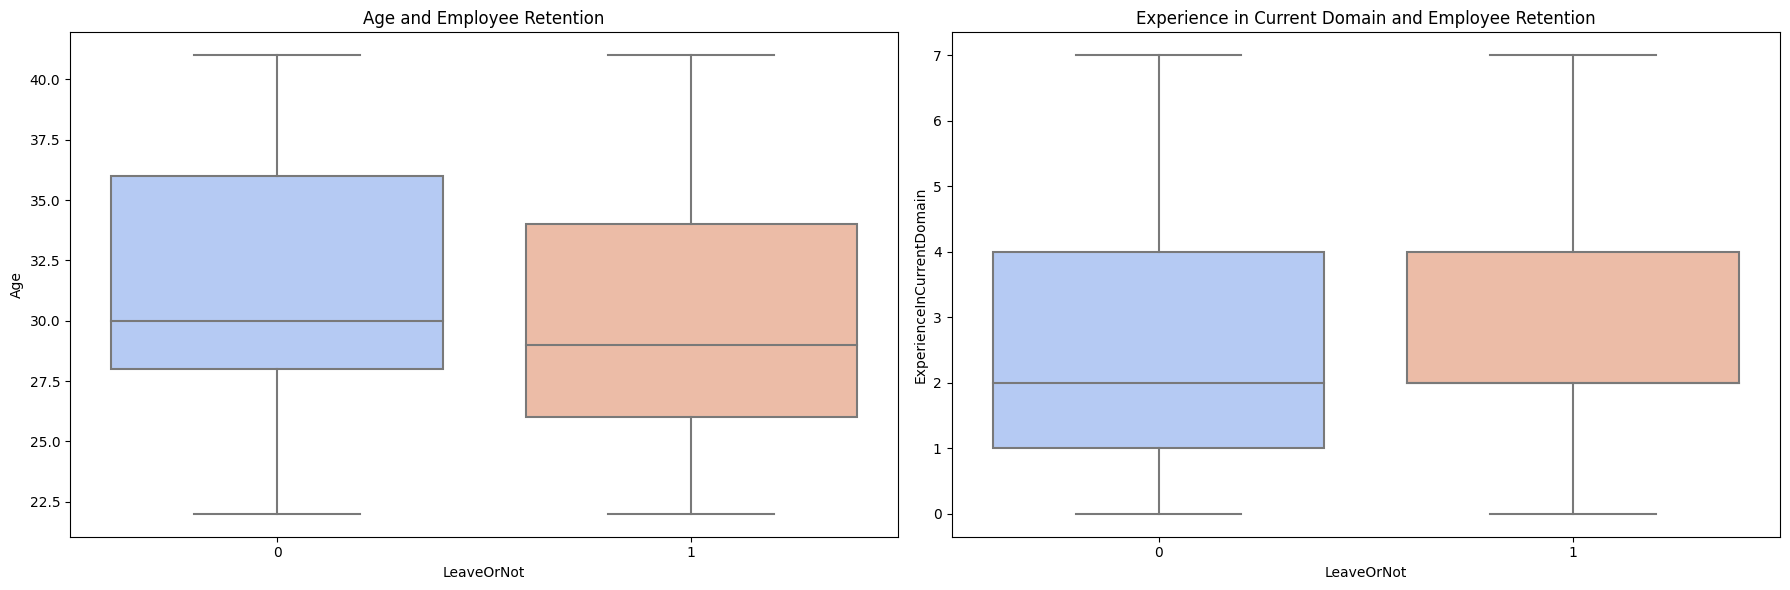

In [42]:
# Age vs LeaveOrNot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='LeaveOrNot', y='Age', data=employee_data, palette='coolwarm')
plt.title('Age and Employee Retention')

# Experience in Current Domain vs LeaveOrNot
plt.subplot(1, 2, 2)
sns.boxplot(x='LeaveOrNot', y='ExperienceInCurrentDomain', data=employee_data, palette='coolwarm')
plt.title('Experience in Current Domain and Employee Retention')

plt.tight_layout()
plt.show()


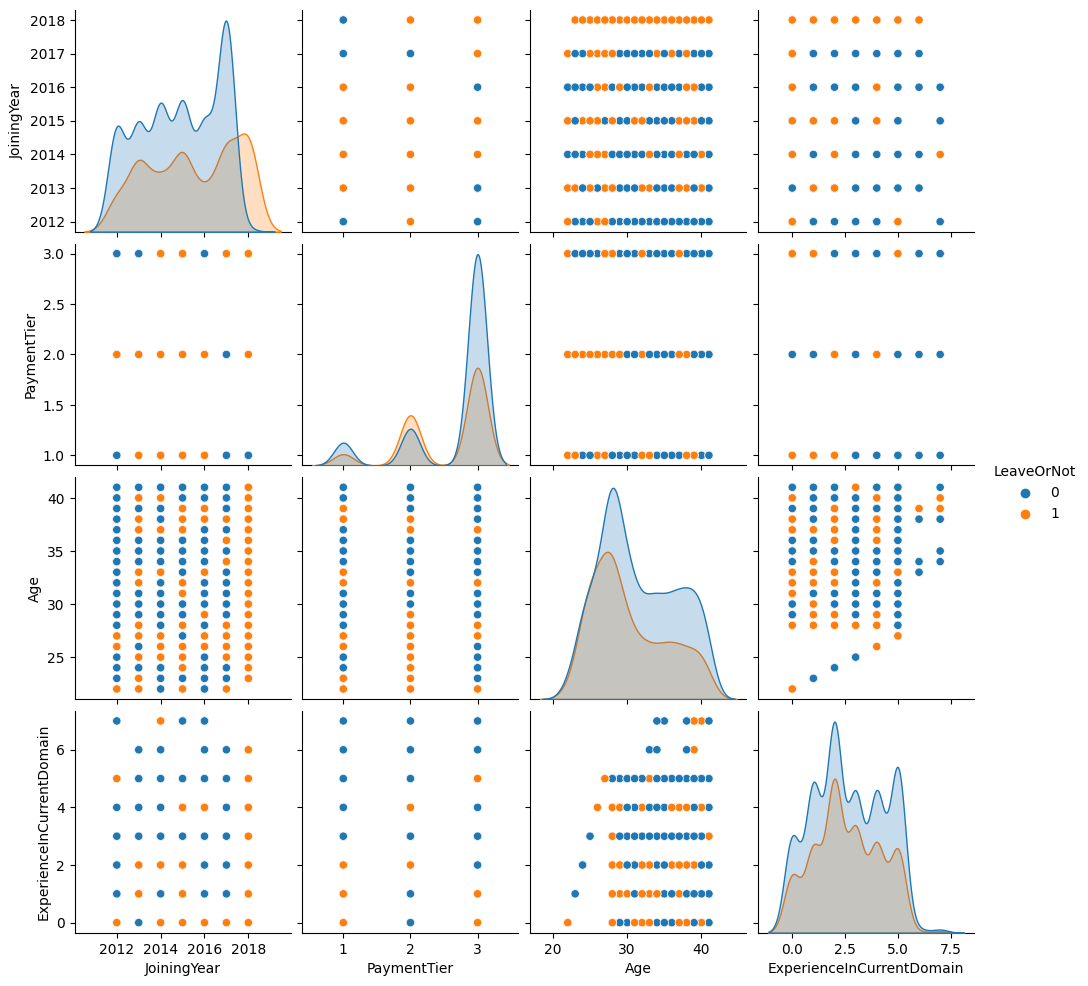

In [53]:
# Pair Plot
sns.pairplot(employee_data, hue='LeaveOrNot')
plt.show()

C:\Users\mishra\AppData\Local\Temp\ipykernel_27476\319716346.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(employee_data.corr(), annot=True)


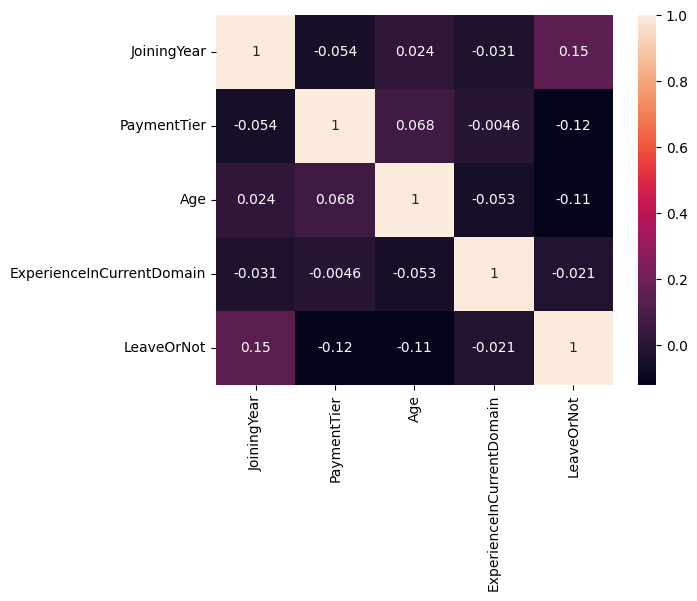

In [54]:


# Correlation Heatmap
sns.heatmap(employee_data.corr(), annot=True)
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handling missing values 
imputer = SimpleImputer(strategy='most_frequent')
employee_data_imputed = pd.DataFrame(imputer.fit_transform(employee_data), columns=employee_data.columns)

# Encoding categorical variables
label_encoders = {}
for column in employee_data_imputed.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    employee_data_imputed[column] = label_encoders[column].fit_transform(employee_data_imputed[column])

# Splitting the dataset into features (X) and target variable (y)
X = employee_data_imputed.drop('LeaveOrNot', axis=1)  
y = employee_data_imputed['LeaveOrNot'].astype('int')

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Output the results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76       333
           1       0.65      0.39      0.49       220

    accuracy                           0.67       553
   macro avg       0.66      0.62      0.62       553
weighted avg       0.67      0.67      0.65       553

Confusion Matrix:
 [[286  47]
 [134  86]]


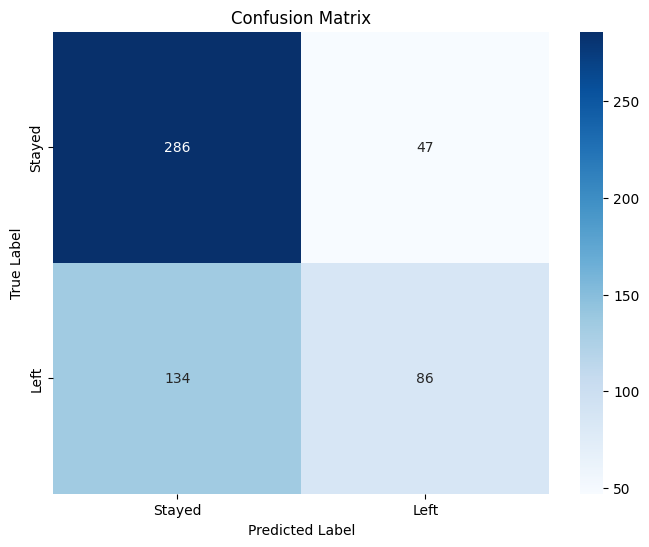

In [51]:
# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

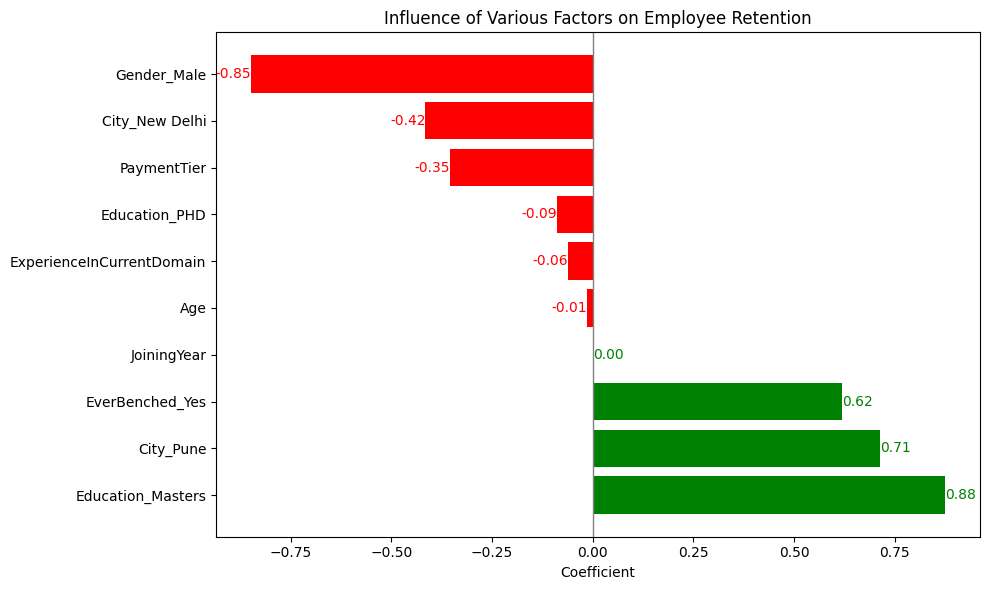

In [46]:
import matplotlib.pyplot as plt

# Visualizing the coefficients from the logistic regression model
colors = ['red' if c < 0 else 'green' for c in coefficients_sorted['Coefficient']]

plt.figure(figsize=(10, 6))
plt.barh(coefficients_sorted.index, coefficients_sorted['Coefficient'], color=colors)
plt.xlabel('Coefficient')
plt.title('Influence of Various Factors on Employee Retention')
plt.axvline(x=0, color='grey', lw=1)

# Adding text labels for coefficients
for index, value in enumerate(coefficients_sorted['Coefficient']):
    if value > 0:
        plt.text(value, index, f'{value:.2f}', va='center', ha='left', color='green')
    else:
        plt.text(value, index, f'{value:.2f}', va='center', ha='right', color='red')

plt.tight_layout()
plt.show()


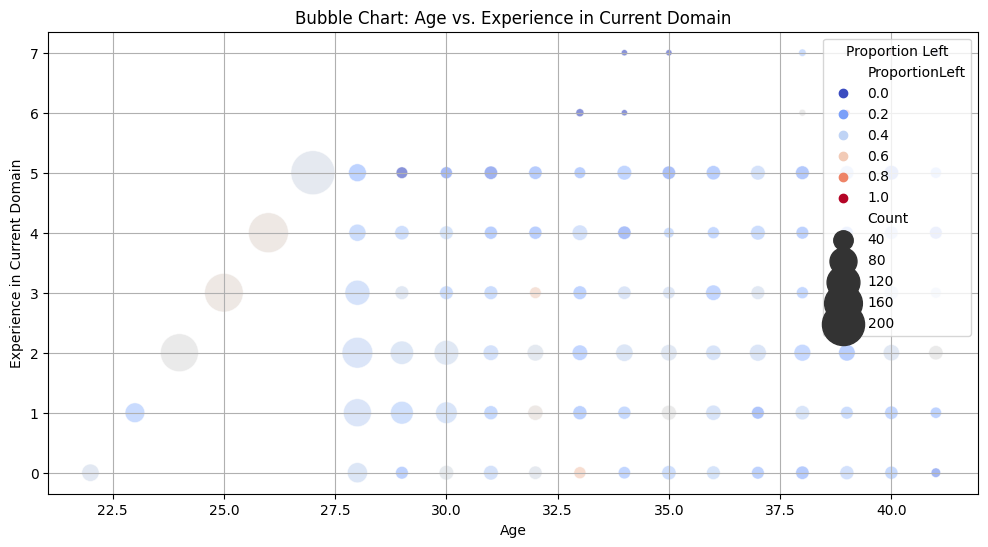

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing data for Bubble Chart
bubble_data = employee_data.groupby(['Age', 'ExperienceInCurrentDomain']).agg({'LeaveOrNot': ['count', 'mean']})
bubble_data.columns = ['Count', 'ProportionLeft']
bubble_data.reset_index(inplace=True)

# Plotting Bubble Chart
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bubble_data, x='Age', y='ExperienceInCurrentDomain', size='Count', 
                hue='ProportionLeft', sizes=(20, 1000), alpha=0.6, palette='coolwarm')
plt.title('Bubble Chart: Age vs. Experience in Current Domain')
plt.xlabel('Age')
plt.ylabel('Experience in Current Domain')
plt.legend(title='Proportion Left', loc='upper right')
plt.grid(True)
plt.show()


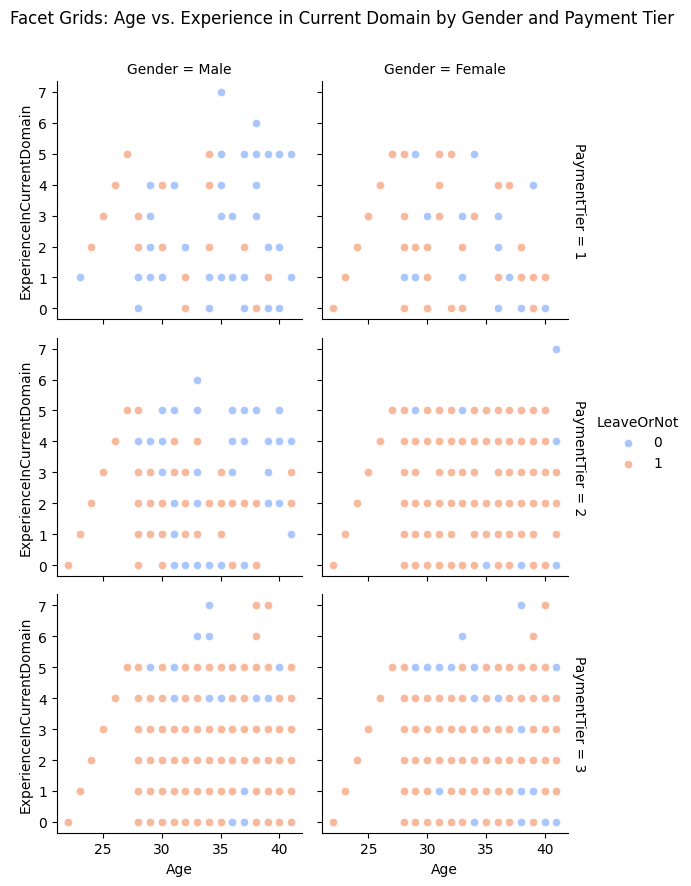

In [48]:
g = sns.FacetGrid(employee_data, col='Gender', row='PaymentTier', hue='LeaveOrNot', palette='coolwarm', margin_titles=True)
g.map(sns.scatterplot, 'Age', 'ExperienceInCurrentDomain')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grids: Age vs. Experience in Current Domain by Gender and Payment Tier')
plt.show()


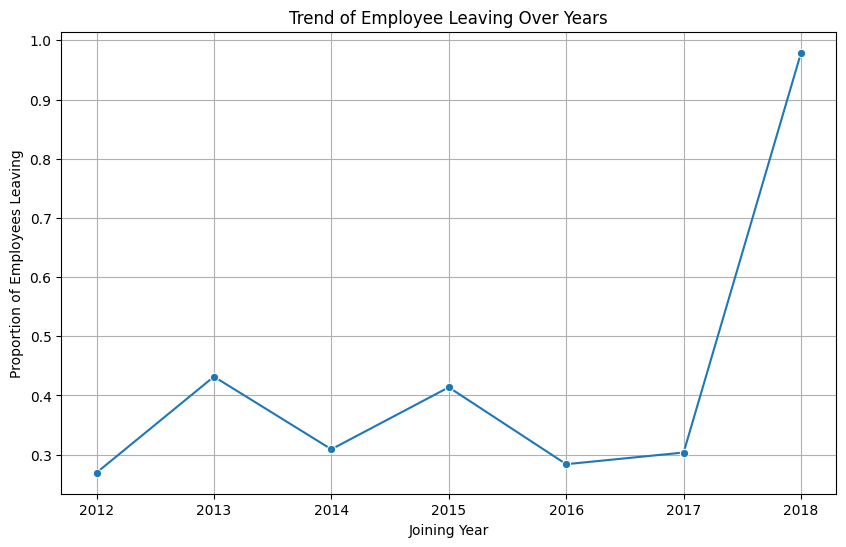

In [49]:
time_series_data = employee_data.groupby('JoiningYear')['LeaveOrNot'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series_data, x='JoiningYear', y='LeaveOrNot', marker='o')
plt.title('Trend of Employee Leaving Over Years')
plt.xlabel('Joining Year')
plt.ylabel('Proportion of Employees Leaving')
plt.grid(True)
plt.show()
